In [22]:
#Import packages

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [23]:
# Chargement des données depuis un fichier Excel
df = pd.read_excel("C:/AnalyseD/fa_data.xlsx")
print(df)

                     Pays  Soutien militaire et politique des États-Unis  \
0   Palestine/Cisjordanie                                             67   
1              Mauritanie                                             62   
2                   Qatar                                             56   
3                   Liban                                             55   
4                   Maroc                                             54   
5                 Algérie                                             53   
6                  Koweït                                             52   
7                Jordanie                                             50   
8                 Tunisie                                             50   
9                    Oman                                             50   
10                  Libye                                             48   
11                  Egypt                                             48   
12          

In [24]:
# Renommer les colonnes avec des abréviations
df = df.rename(columns={
    'Soutien militaire et politique des États-Unis': 'SMPEU',
    'Le manque d\'action décisive des gouvernements arabes envers Israël': 'MDAGAEI',
    'Accords de normalisation': 'AN',
    'Le soutien des gouvernements occidentaux à Israël': 'SGOI',
    'Le manque d\'action décisive de l\'ONU envers Israël': 'MDADONUI',
    'Le manque de positions pratiques de l\'Autorité palestinienne contre Israël': 'MDPPLAPI',
    'Autre': 'Autre',
    'Je ne sais pas/J\'ai refusé de répondre': 'NS'
})


print(df)


                     Pays  SMPEU  MDAGAEI  AN  SGOI  MDADONUI  MDPPLAPI  \
0   Palestine/Cisjordanie     67        9  14     1         6         3   
1              Mauritanie     62       13   7     9         1         1   
2                   Qatar     56       11  12     9         4         3   
3                   Liban     55       15  12     6         3         3   
4                   Maroc     54       13   4     9         3         1   
5                 Algérie     53       11  10    13         3         2   
6                  Koweït     52       13  15     9         5         2   
7                Jordanie     50       13   8    11         4         1   
8                 Tunisie     50       16  12    13         3         1   
9                    Oman     50       16  10    10         4         1   
10                  Libye     48       17  10    14         4         1   
11                  Egypt     48       13   7    13         4         1   
12                  Yemen

In [25]:
#Analyse de la dimension de la base de données
df.shape

(16, 9)

In [26]:
# Analyse du type de variable dans la base de données
df.dtypes

Pays        object
SMPEU        int64
MDAGAEI      int64
AN           int64
SGOI         int64
MDADONUI     int64
MDPPLAPI     int64
Autre        int64
NS           int64
dtype: object

In [27]:
# Description des variables qualitatives
df.describe()

,SMPEU,MDAGAEI,AN,SGOI,MDADONUI,MDPPLAPI,Autre,NS
count,16.000000,16.00000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,50.875000,13.75000,11.18750,10.062500,4.000000,1.750000,1.937500,6.437500
std,7.401576,2.67083,4.03681,3.336041,1.414214,1.183216,2.205108,5.489004
min,36.000000,9.00000,4.00000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,47.750000,12.50000,8.00000,9.000000,3.000000,1.000000,0.000000,3.000000
50%,50.000000,13.00000,11.00000,9.500000,4.000000,1.000000,1.500000,5.000000
75%,54.250000,16.00000,14.00000,13.000000,5.000000,2.250000,3.000000,7.500000
max,67.000000,18.00000,20.00000,14.000000,7.000000,5.000000,8.000000,23.000000


In [28]:
# Analyse de données manquantes

df.isnull().sum()

Pays        0
SMPEU       0
MDAGAEI     0
AN          0
SGOI        0
MDADONUI    0
MDPPLAPI    0
Autre       0
NS          0
dtype: int64

In [29]:
# Analyse desciptive du jeu de données
df.describe()


,SMPEU,MDAGAEI,AN,SGOI,MDADONUI,MDPPLAPI,Autre,NS
count,16.000000,16.00000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,50.875000,13.75000,11.18750,10.062500,4.000000,1.750000,1.937500,6.437500
std,7.401576,2.67083,4.03681,3.336041,1.414214,1.183216,2.205108,5.489004
min,36.000000,9.00000,4.00000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,47.750000,12.50000,8.00000,9.000000,3.000000,1.000000,0.000000,3.000000
50%,50.000000,13.00000,11.00000,9.500000,4.000000,1.000000,1.500000,5.000000
75%,54.250000,16.00000,14.00000,13.000000,5.000000,2.250000,3.000000,7.500000
max,67.000000,18.00000,20.00000,14.000000,7.000000,5.000000,8.000000,23.000000


In [30]:
# Description des variables qualitatives
df.describe(include="object")

,Pays
count,16
unique,16
top,Palestine/Cisjordanie
freq,1


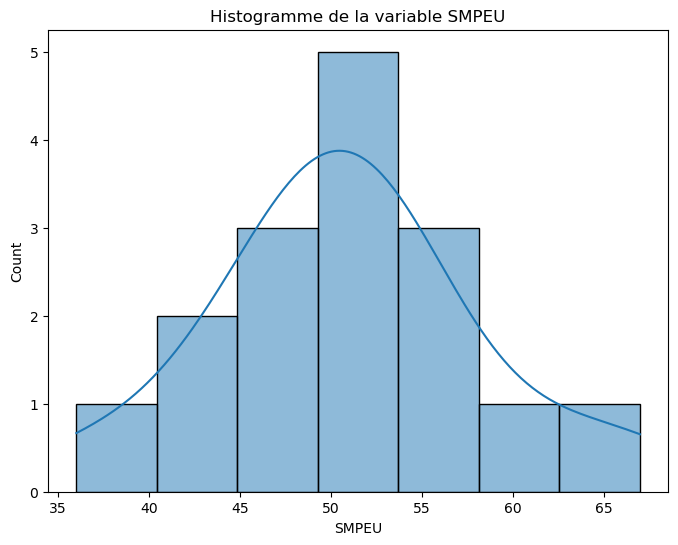

La variable SMPEU suit une loi normale (p-value=0.8506527543067932)


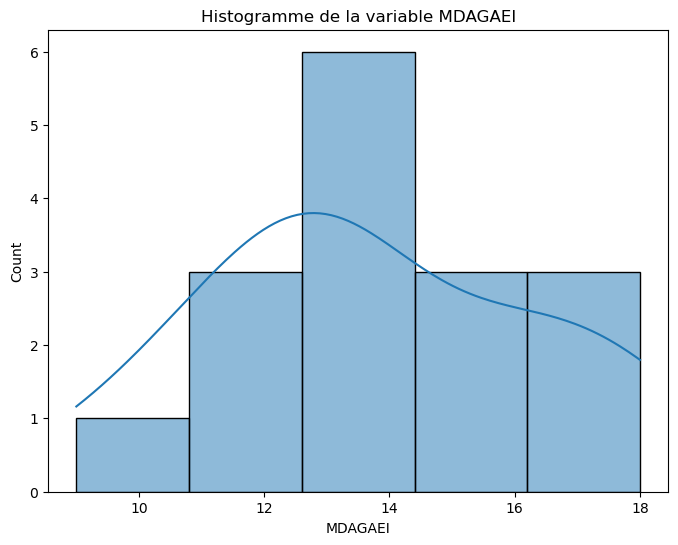

La variable MDAGAEI suit une loi normale (p-value=0.23546406626701355)


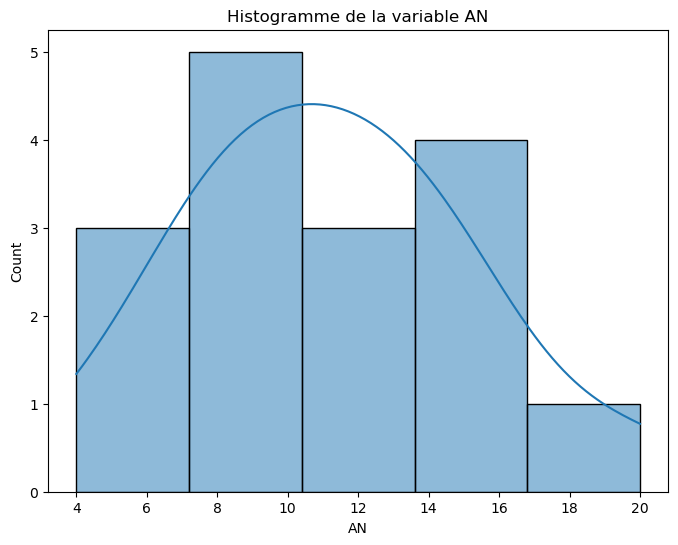

La variable AN suit une loi normale (p-value=0.9408287405967712)


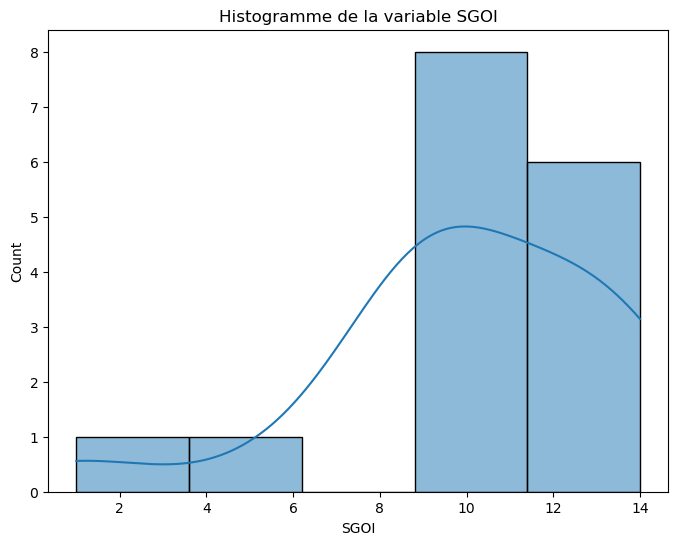

La variable SGOI ne suit pas une loi normale (p-value=0.022002730518579483)


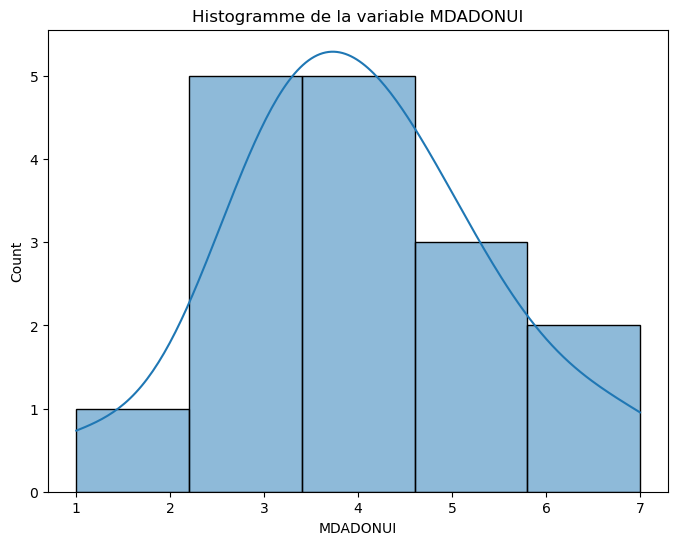

La variable MDADONUI suit une loi normale (p-value=0.3177717626094818)


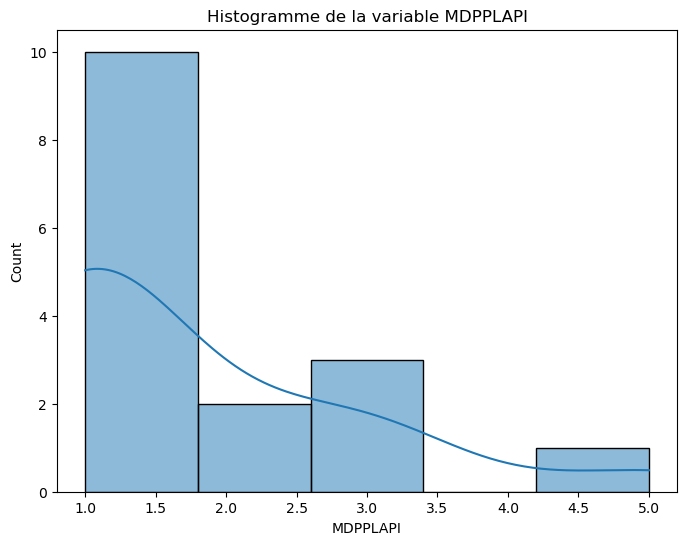

La variable MDPPLAPI ne suit pas une loi normale (p-value=0.0001447863905923441)


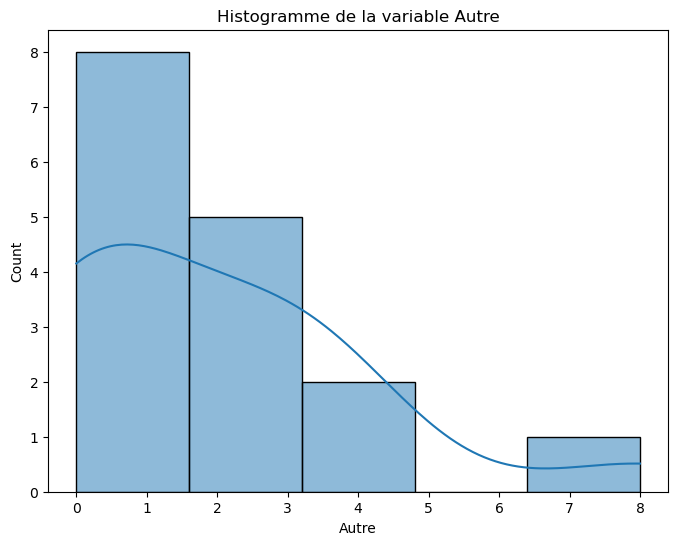

La variable Autre ne suit pas une loi normale (p-value=0.006319986190646887)


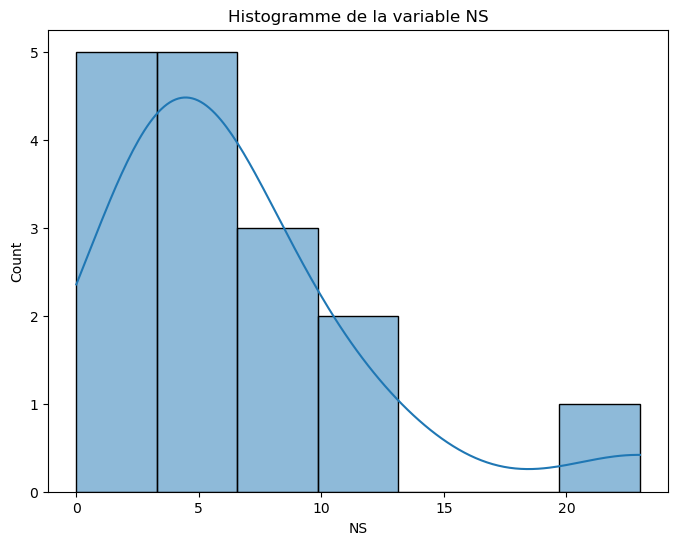

La variable NS ne suit pas une loi normale (p-value=0.0035529749002307653)


In [204]:
# Sélection des colonnes numériques uniquement
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Analyse de la normalité avec le test de Shapiro-Wilk
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.shapiro(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")


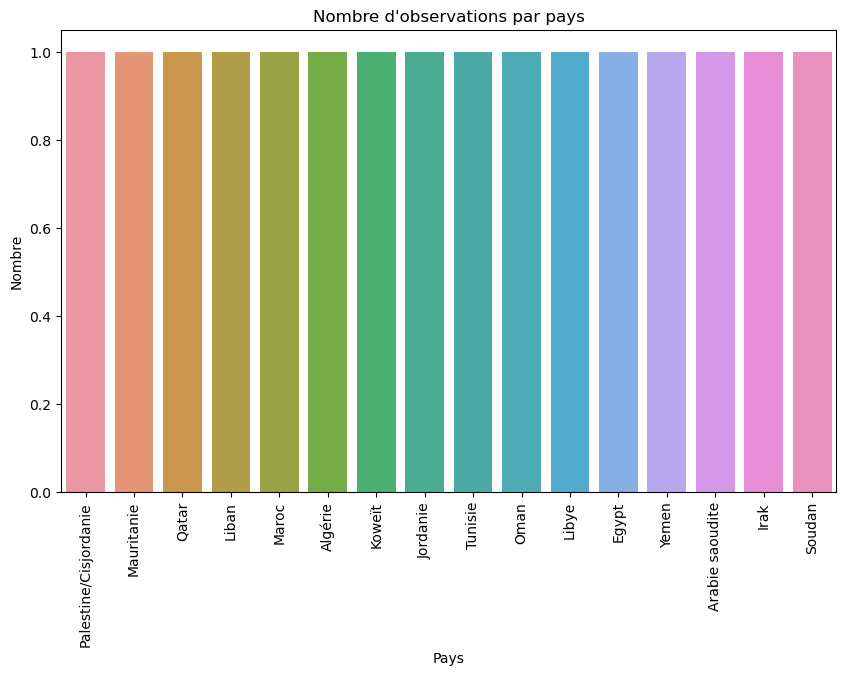

In [127]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Pays'])
plt.xticks(rotation=90)  # Rotation de 90 degrés pour les étiquettes sur l'axe x
plt.xlabel('Pays')
plt.ylabel('Nombre')
plt.title('Nombre d\'observations par pays')
plt.show()

([<matplotlib.patches.Wedge at 0x27671cc9a90>,
 [Text(1.0788638084435536, 0.2145993542177411, 'Palestine/Cisjordanie'),
  Text(0.9146165735327998, 0.6111272563215624, 'Mauritanie'),
  Text(0.6111272563215626, 0.9146165735327998, 'Qatar'),
  Text(0.21459935421774118, 1.0788638084435536, 'Liban'),
  Text(-0.21459935421774104, 1.0788638084435536, 'Maroc'),
  Text(-0.6111272563215622, 0.9146165735327999, 'Algérie'),
  Text(-0.9146165735327999, 0.6111272563215624, 'Koweït'),
  Text(-1.0788638084435536, 0.21459935421774148, 'Jordanie'),
  Text(-1.0788638084435536, -0.2145993542177412, 'Tunisie'),
  Text(-0.9146165735328001, -0.6111272563215622, 'Oman'),
  Text(-0.6111272563215624, -0.9146165735327998, 'Libye'),
  Text(-0.21459935421774154, -1.0788638084435533, 'Egypt'),
  Text(0.21459935421774115, -1.0788638084435536, 'Yemen'),
  Text(0.6111272563215621, -0.9146165735328001, 'Arabie saoudite'),
  Text(0.9146165735327998, -0.6111272563215624, 'Irak'),
  Text(1.0788638084435533, -0.21459935421

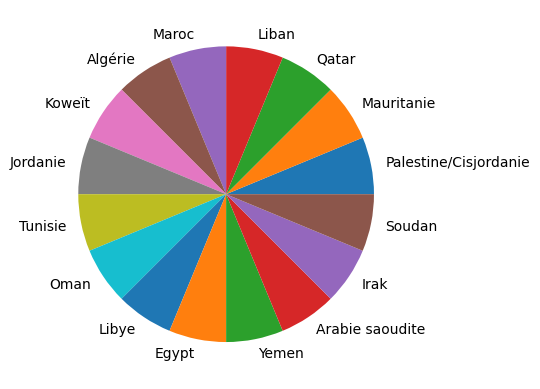

In [32]:
# Création d'un tableau de fréquences pour la variable "species"
freq_table = (df['Pays'].value_counts())/len(df)

freq_table

#Création d'un diagramme circulaire pour le tableua de fréquence


plt.pie(freq_table,labels=freq_table.index)

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


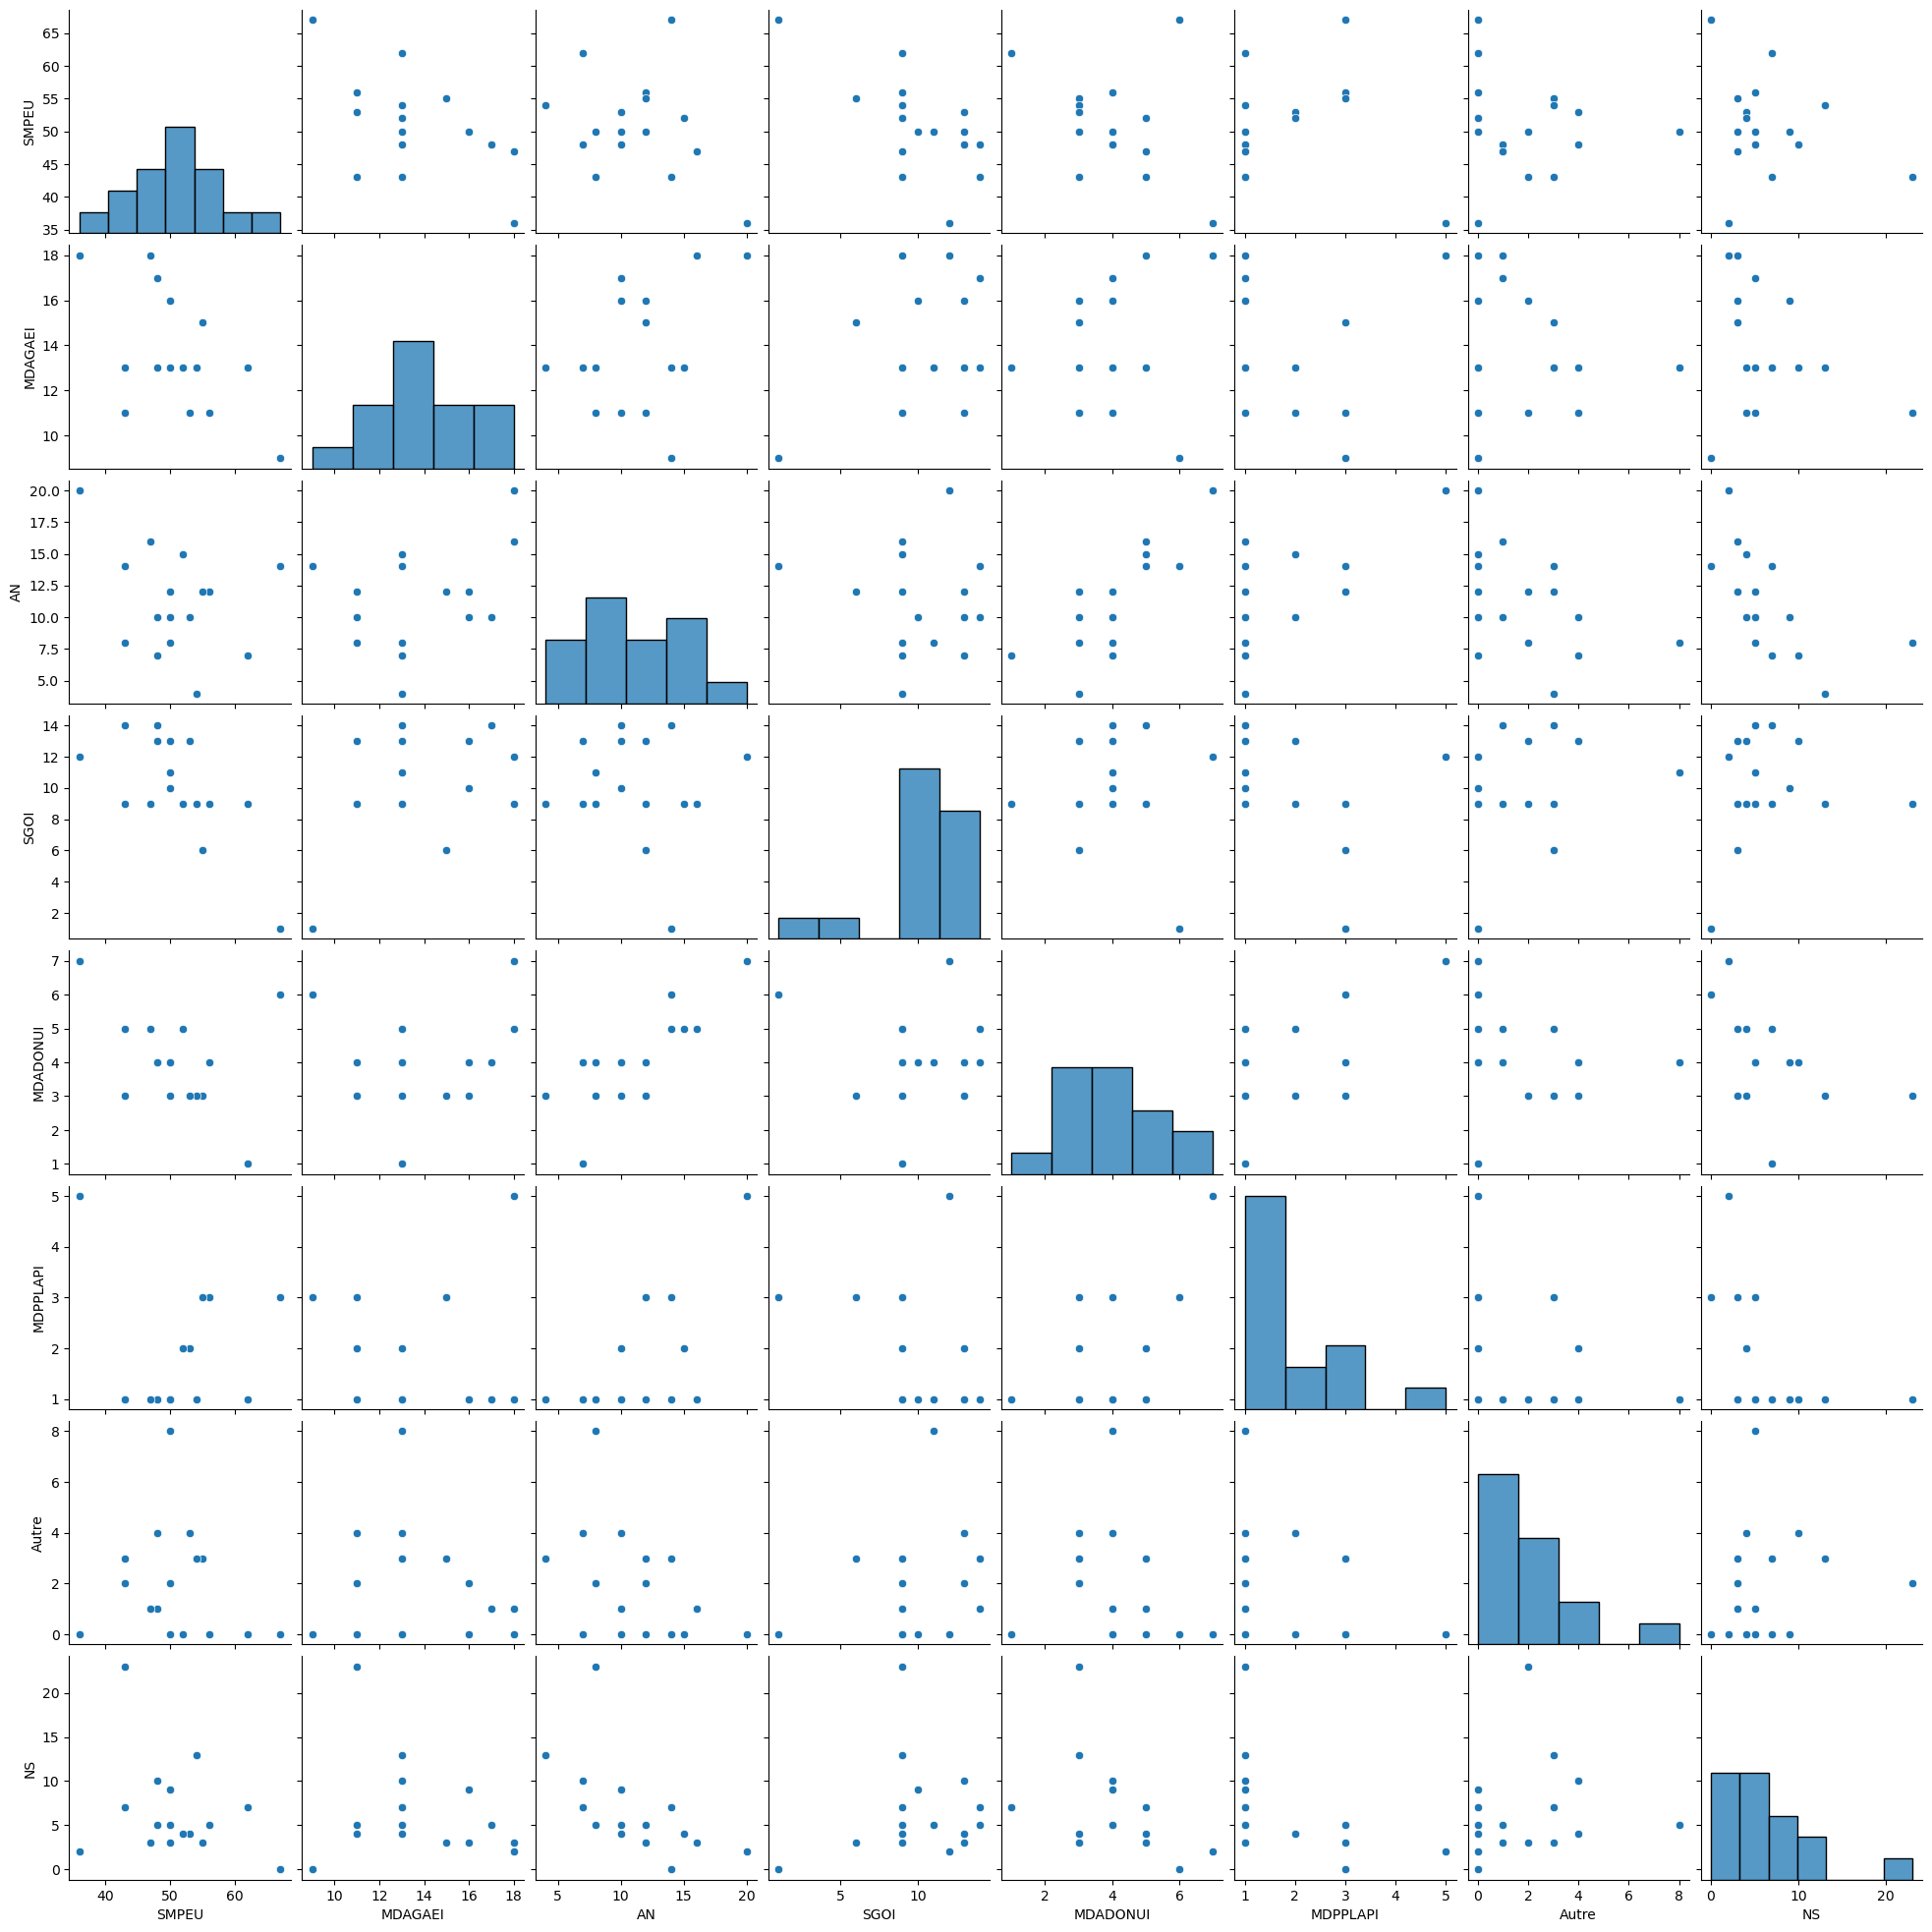

In [206]:
# Relation entre les variables quantitatives
sns.pairplot(df)

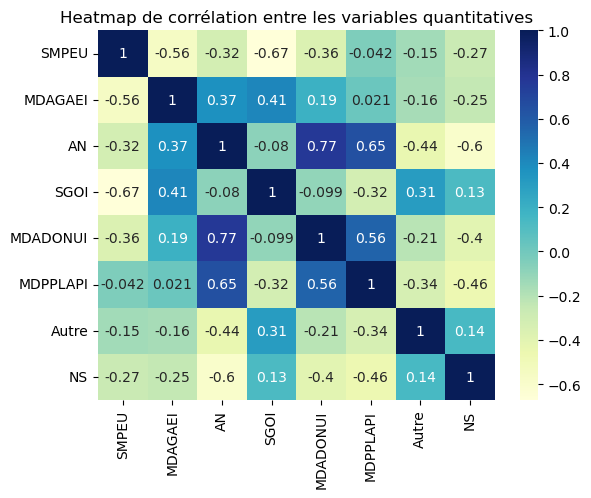

In [207]:
# Exclusion des variables qualitatives
numeric_df = df.select_dtypes(include=np.number)

# Calcul de la matrice de corrélation
corr_matrix = numeric_df.corr()

# Affichage de la heatmap de corrélation
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

plt.title("Heatmap de corrélation entre les variables quantitatives")
plt.show()


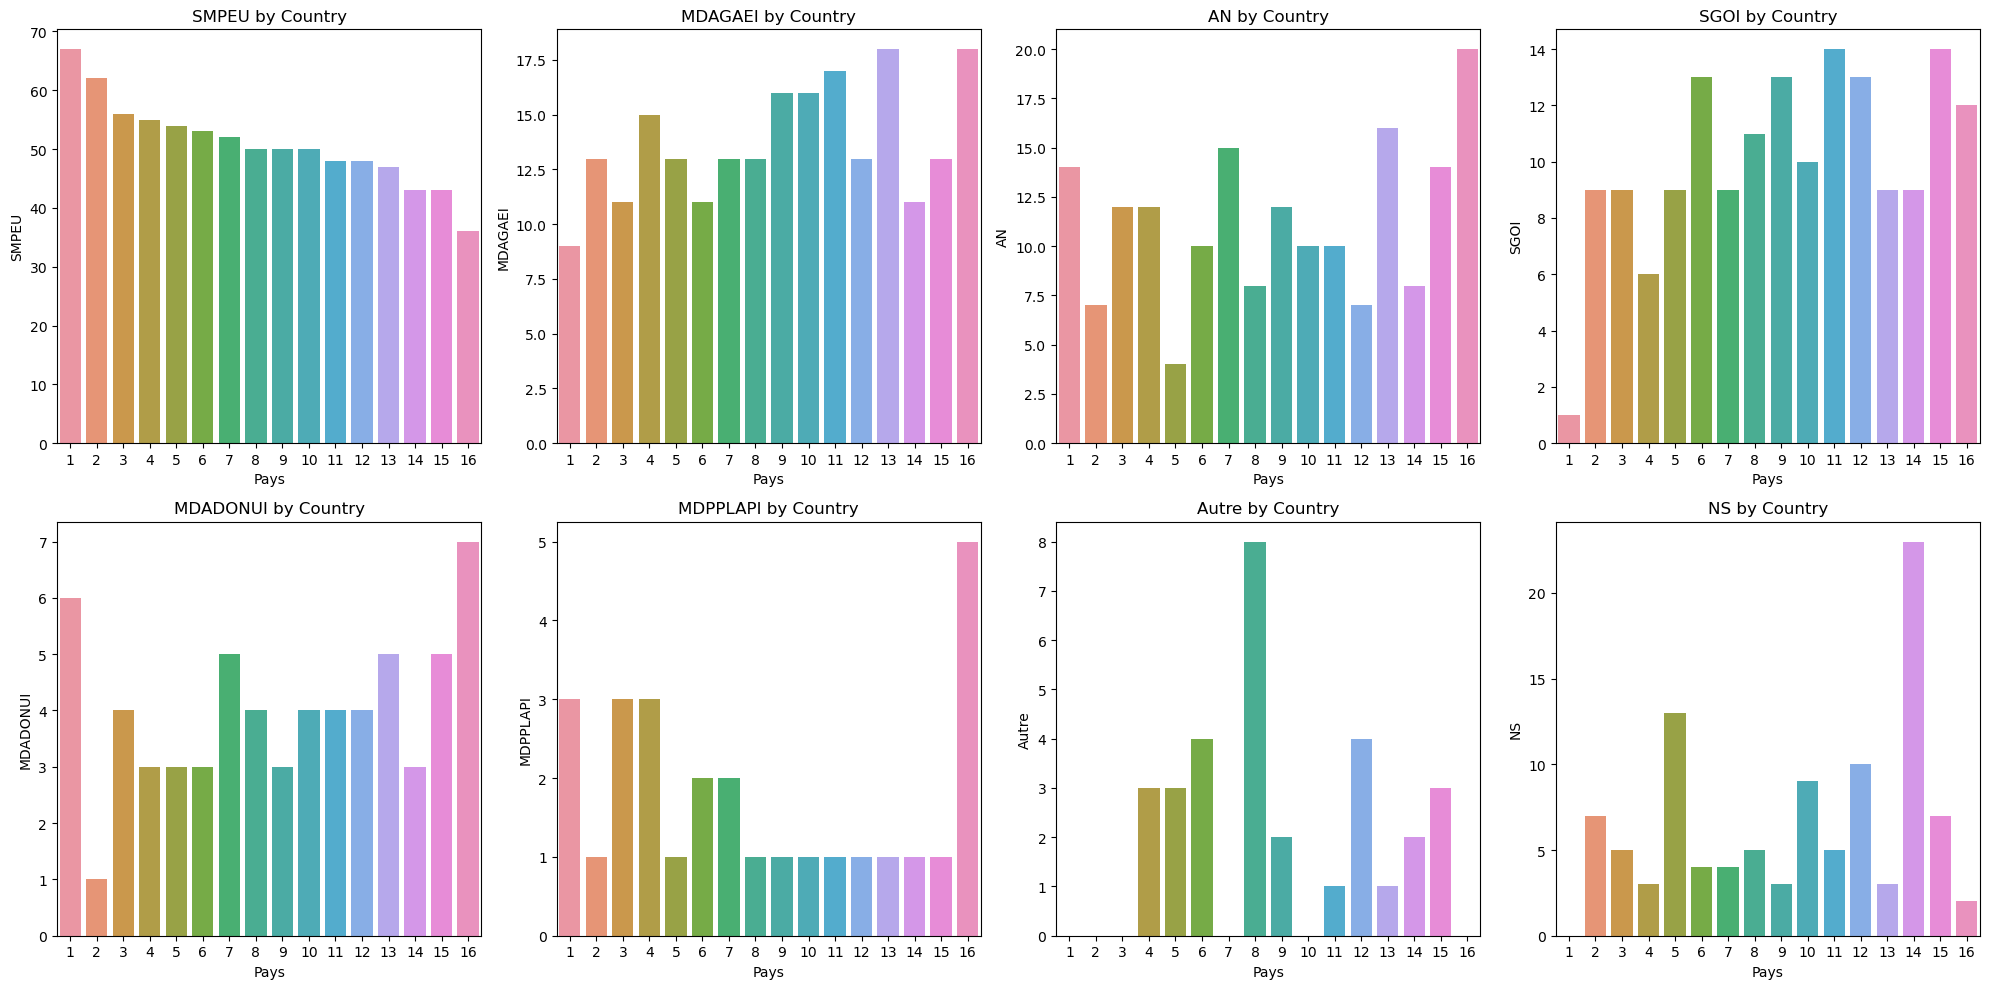

In [221]:
#relation entre les variable et les pays

# Sauvegarde des noms de pays dans une variable temporaire
noms_pays = df['Pays'].copy()

# Création d'un index numérique pour les pays
df['Pays'] = range(1, len(df) + 1)

# Liste des colonnes numériques
numeric_columns = df.columns[1:]


# Temporairement remplacer les index numériques par les noms de pays dans la colonne 'Pays'
df['Pays'] = df['Pays']

# Création des bar plots pour chaque variable groupée par pays
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, column in enumerate(numeric_columns):
    sns.barplot(x='Pays', y=column, data=df, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{column} by Country')

plt.tight_layout()
plt.show()

# Restaurer les index numériques dans la colonne 'Pays'
df['Pays'] = noms_pays


In [33]:
# Effectuer le test de Kruskal-Wallis pour chaque variable numérique
for column in df.columns[1:]:  # Exclure la première colonne "Pays"
    _, p_value = stats.kruskal(*[df[column][df['Pays'] == country] for country in df['Pays'].unique()])
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les pays (p-value={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les pays (p-value={p_value})")

La variable SMPEU n'est pas significativement différente entre les pays (p-value=0.451417211225725)
La variable MDAGAEI n'est pas significativement différente entre les pays (p-value=0.451417211225725)
La variable AN n'est pas significativement différente entre les pays (p-value=0.45141721122572465)
La variable SGOI n'est pas significativement différente entre les pays (p-value=0.451417211225725)
La variable MDADONUI n'est pas significativement différente entre les pays (p-value=0.451417211225725)
La variable MDPPLAPI n'est pas significativement différente entre les pays (p-value=0.45141721122572465)
La variable Autre n'est pas significativement différente entre les pays (p-value=0.451417211225725)
La variable NS n'est pas significativement différente entre les pays (p-value=0.451417211225725)


In [34]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print("Variables explicatives (X):")
print(X)

print("\nVariable qualitative (y):")
print(y)

Variables explicatives (X):
[[67  9 14  1  6  3  0  0]
 [62 13  7  9  1  1  0  7]
 [56 11 12  9  4  3  0  5]
 [55 15 12  6  3  3  3  3]
 [54 13  4  9  3  1  3 13]
 [53 11 10 13  3  2  4  4]
 [52 13 15  9  5  2  0  4]
 [50 13  8 11  4  1  8  5]
 [50 16 12 13  3  1  2  3]
 [50 16 10 10  4  1  0  9]
 [48 17 10 14  4  1  1  5]
 [48 13  7 13  4  1  4 10]
 [47 18 16  9  5  1  1  3]
 [43 11  8  9  3  1  2 23]
 [43 13 14 14  5  1  3  7]
 [36 18 20 12  7  5  0  2]]

Variable qualitative (y):
['Palestine/Cisjordanie' 'Mauritanie' 'Qatar' 'Liban' 'Maroc' 'Algérie'
 'Koweït' 'Jordanie' 'Tunisie' 'Oman' 'Libye' 'Egypt' 'Yemen'
 'Arabie saoudite' 'Irak' 'Soudan']


In [70]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X)

In [35]:
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,6.668126e+01,52.0,52.0
1,Dim2,4.043719e+01,32.0,84.0
2,Dim3,1.135669e+01,9.0,93.0
3,Dim4,4.851379e+00,4.0,97.0
4,Dim5,3.054855e+00,2.0,99.0
5,Dim6,7.376907e-01,1.0,100.0
6,Dim7,6.142652e-01,0.0,100.0
7,Dim8,1.289543e-31,0.0,100.0


Text(3.25, 26, '25%')

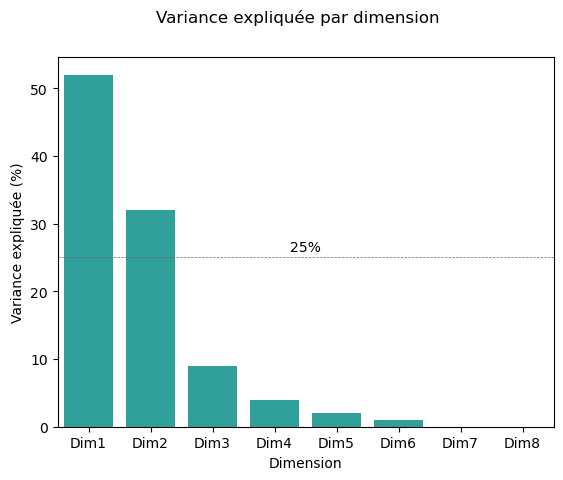

In [36]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

In [37]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df.columns[1:]

print(df_cos_squared)

               PC1           PC2       PC3       PC4       PC5       PC6  \
SMPEU     0.813378  3.204413e-02  0.014062  0.083987  0.002441  0.000026   
MDAGAEI   0.008495  3.434207e-02  0.306742  0.000451  0.020815  0.012550   
AN        0.004386  2.564180e-02  0.225011  0.371797  0.027764  0.021433   
SGOI      0.019895  5.169830e-01  0.012760  0.006459  0.038132  0.013335   
MDADONUI  0.015167  2.642840e-01  0.046964  0.411153  0.001231  0.000158   
MDPPLAPI  0.013586  1.705039e-03  0.227718  0.000947  0.076964  0.598991   
Autre     0.000093  8.693005e-09  0.041743  0.000206  0.707653  0.228508   
NS        0.125000  1.250000e-01  0.125000  0.125000  0.125000  0.125000   

               PC7       PC8  
SMPEU     0.001708  0.052354  
MDAGAEI   0.010753  0.605853  
AN        0.142405  0.181562  
SGOI      0.382143  0.010293  
MDADONUI  0.257125  0.003918  
MDPPLAPI  0.060743  0.019347  
Autre     0.020124  0.001673  
NS        0.125000  0.125000  


In [292]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=df.columns[1:9]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

          PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
SMPEU       54.237069     0.343517     0.049816     0.096520     0.046332   
MDAGAEI      2.136743     1.388697     0.291206     2.508080     0.807349   
AN           0.937678    12.403774     2.555382     0.061904     0.143468   
SGOI         5.600383     0.018225     4.222386     0.031335     1.256014   
MDADONUI     0.162772     0.841710     0.315303     0.184991     0.003761   
MDPPLAPI     0.001711     0.507473     0.243404     0.064694     0.000483   
Autre        0.113876     0.434809     1.617245     1.853920     0.785478   
NS           3.491028    24.498988     2.061947     0.049935     0.011969   

          PC6_contrib   PC7_contrib   PC8_contrib  
SMPEU        0.010022  5.685276e-05  1.611928e-32  
MDAGAEI      0.001258  5.339810e-09  1.611928e-32  
AN           0.167985  2.564135e-02  1.611928e-32  
SGOI         0.000698  1.265225e-04  1.611928e-32  
MDADONUI     0.056775  4.346868e-01  1.611928e

In [40]:
# Calculating the contribution of variables to the formation of axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_

# Calculating the percentage contribution of variables
variable_contributions = (loadings**2) * eigenvalues

# Converting contributions to percentage
variable_contrib_percent = variable_contributions / eigenvalues.sum(axis=0) * 100

# Creating a DataFrame for easier display
column_names = [f'PC{i+1}_contrib' for i in range(loadings.shape[1])]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=df.columns[1:])

print(variable_contrib_df)

          PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
SMPEU       42.461171     0.268933     0.039000     0.075564     0.036273   
MDAGAEI      1.672816     1.087184     0.227980     1.963528     0.632058   
AN           0.734091     9.710679     2.000560     0.048463     0.112319   
SGOI         4.384434     0.014268     3.305626     0.024531     0.983309   
MDADONUI     0.127431     0.658958     0.246845     0.144826     0.002945   
MDPPLAPI     0.001340     0.397291     0.190557     0.050647     0.000378   
Autre        0.089151     0.340404     1.266111     1.451398     0.614936   
NS           2.733059    19.179793     1.614259     0.039094     0.009370   

          PC6_contrib   PC7_contrib   PC8_contrib  
SMPEU        0.007846  4.450894e-05  1.261948e-32  
MDAGAEI      0.000985  4.180436e-09  1.261948e-32  
AN           0.131513  2.007413e-02  1.261948e-32  
SGOI         0.000547  9.905203e-05  1.261948e-32  
MDADONUI     0.044448  3.403080e-01  1.261948e

In [294]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

    PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
0     34.359851     3.900921    14.073986     6.106745     0.126509   
1     11.481680     2.745685     1.398407    14.412827     3.354040   
2      3.089523     0.139612     1.134572     0.353797    12.259532   
3      2.708733     1.344064     0.160399     0.014942    21.830853   
4      0.639958    14.940183     0.292881     1.087805     5.048325   
5      0.462534     0.003099     8.813237     9.137537     9.382443   
6      0.238251     2.677159     3.163787     0.037386     4.402882   
7      0.021060     0.319335    13.298347    20.966751    18.234262   
8      0.160850     1.709897     6.637276     3.028232     0.674053   
9      0.223166     0.640966     0.431723    12.927855     0.375580   
10     1.361374     0.244633     7.383148    10.850793     0.782788   
11     1.295348     4.384965     4.429798     1.454725     0.062864   
12     1.315434     6.867523     1.161326     5.165320     8.891980   
13    

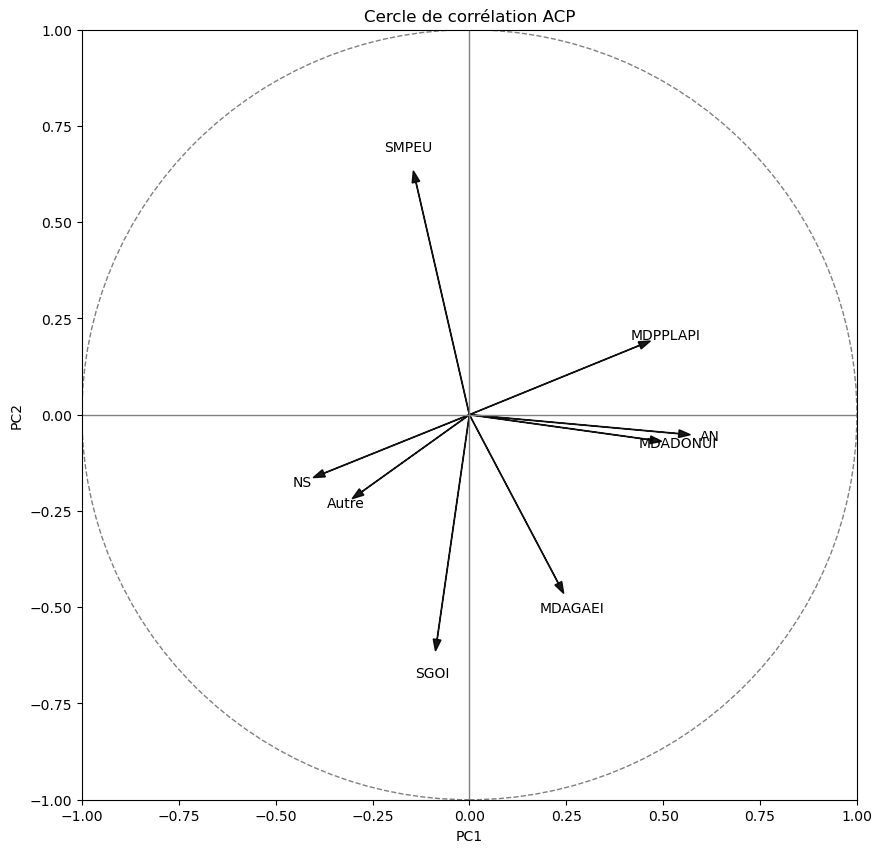

In [68]:
feature_names=df.columns[1:90]

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP')

# Afficher la figure
plt.show()

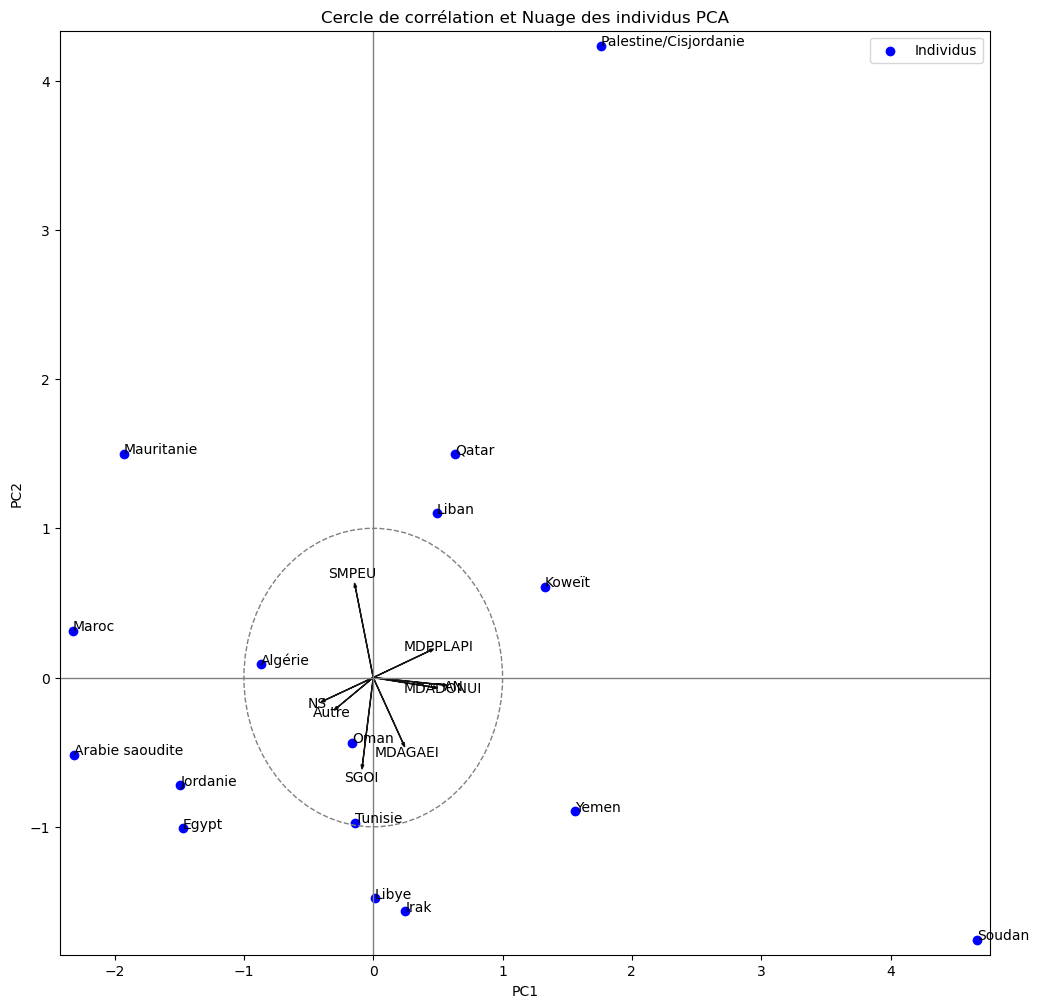

In [69]:
# Calculer les limites des données
x_min, x_max = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
y_min, y_max = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1

# Nuage des individus
# Nuage des individus sur les deux premières composantes principales
plt.figure(figsize=(12, 12))  # Ajuster la taille de la figure
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Individus')

# Ajouter les noms des pays
for i, txt in enumerate(y):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]))

# Ajuster les limites et les axes
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation et Nuage des individus PCA')

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Afficher la figure
plt.legend()
plt.show()
